In [0]:
!pip install git+https://github.com/fastai/fastai.git

In [0]:
from fastai.vision import *
from fastai.imports import *
from sklearn.utils import shuffle
import imageio

In [7]:
!wget http://www.robots.ox.ac.uk/~vgg/data/pets/data/images.tar.gz

--2019-03-12 18:42:28--  http://www.robots.ox.ac.uk/~vgg/data/pets/data/images.tar.gz
Resolving www.robots.ox.ac.uk (www.robots.ox.ac.uk)... 129.67.94.2
Connecting to www.robots.ox.ac.uk (www.robots.ox.ac.uk)|129.67.94.2|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 791918971 (755M) [application/x-gzip]
Saving to: ‘images.tar.gz’

images.tar.gz       100%[===================>] 755.23M  92.6MB/s    in 8.2s    

2019-03-12 18:42:36 (91.9 MB/s) - ‘images.tar.gz’ saved [791918971/791918971]



In [0]:
!tar -xf images.tar.gz

In [12]:
!ls images | head -4

Abyssinian_100.jpg
Abyssinian_100.mat
Abyssinian_101.jpg
Abyssinian_101.mat


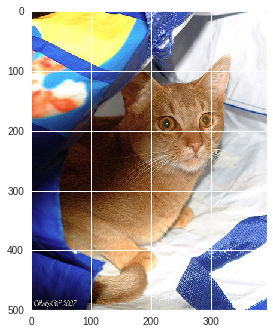

In [13]:
plt.imshow(imageio.imread("./images/Abyssinian_100.jpg"))
plt.show()

In [0]:
fnames = get_image_files("./images")
pat = r'/([^/]+)_\d+.jpg$'
bs = 64

In [0]:
data = ImageDataBunch.from_name_re("./images", fnames, pat, ds_tfms=get_transforms(), size=224, bs=bs
                                  ).normalize(imagenet_stats)

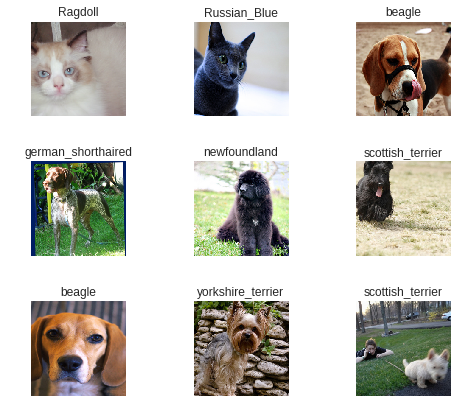

In [18]:
data.show_batch(rows=3, figsize=(7,6))

In [19]:
data.classes

['Abyssinian',
 'Bengal',
 'Birman',
 'Bombay',
 'British_Shorthair',
 'Egyptian_Mau',
 'Maine_Coon',
 'Persian',
 'Ragdoll',
 'Russian_Blue',
 'Siamese',
 'Sphynx',
 'american_bulldog',
 'american_pit_bull_terrier',
 'basset_hound',
 'beagle',
 'boxer',
 'chihuahua',
 'english_cocker_spaniel',
 'english_setter',
 'german_shorthaired',
 'great_pyrenees',
 'havanese',
 'japanese_chin',
 'keeshond',
 'leonberger',
 'miniature_pinscher',
 'newfoundland',
 'pomeranian',
 'pug',
 'saint_bernard',
 'samoyed',
 'scottish_terrier',
 'shiba_inu',
 'staffordshire_bull_terrier',
 'wheaten_terrier',
 'yorkshire_terrier']

In [0]:
learn = cnn_learner(data, models.resnet34, metrics=accuracy)

In [21]:
learn.fit_one_cycle(4)

epoch,train_loss,valid_loss,accuracy,time
0,1.355044,0.310492,0.901894,02:01
1,0.551216,0.250932,0.916103,02:00
2,0.352847,0.214549,0.928281,02:01
3,0.259610,0.199273,0.930311,02:01


LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


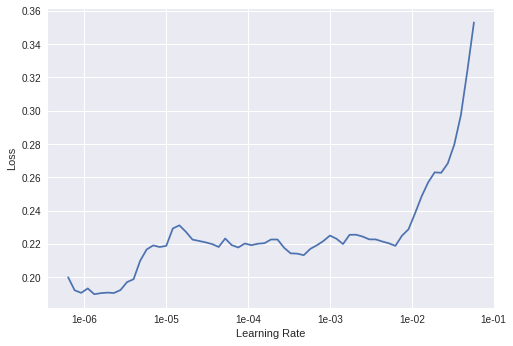

In [23]:
learn.lr_find()
learn.recorder.plot()

In [0]:
learn.save("stage-1")

In [26]:
learn.unfreeze()
learn.fit_one_cycle(2, max_lr=slice(1e-5,  1e-3))

epoch,train_loss,valid_loss,accuracy,time
0,0.306018,0.280006,0.901218,02:06
1,0.213697,0.179890,0.935047,02:09


In [0]:
interp=ClassificationInterpretation.from_learner(learn)

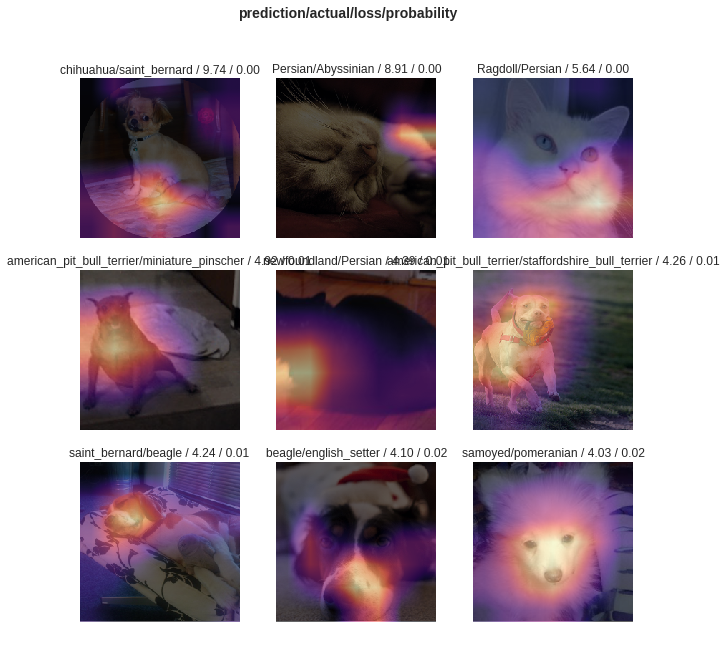

In [32]:
interp.plot_top_losses(9, figsize=(10, 10))

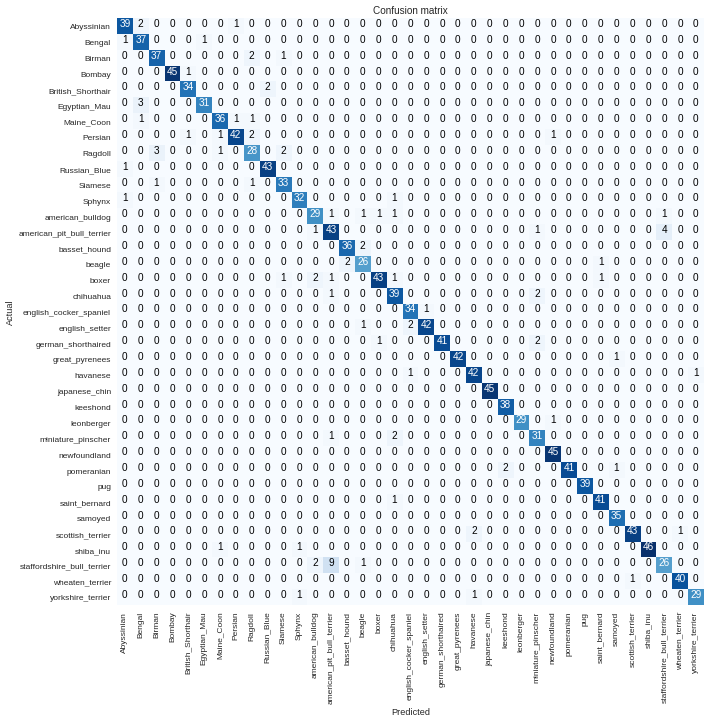

In [33]:
interp.plot_confusion_matrix(figsize=(12,12), dpi=60)

In [30]:
interp.most_confused(min_val=2)

[('staffordshire_bull_terrier', 'american_pit_bull_terrier', 9),
 ('american_pit_bull_terrier', 'staffordshire_bull_terrier', 4),
 ('Egyptian_Mau', 'Bengal', 3),
 ('Ragdoll', 'Birman', 3),
 ('Abyssinian', 'Bengal', 2),
 ('Birman', 'Ragdoll', 2),
 ('British_Shorthair', 'Russian_Blue', 2),
 ('Persian', 'Ragdoll', 2),
 ('Ragdoll', 'Siamese', 2),
 ('basset_hound', 'beagle', 2),
 ('beagle', 'basset_hound', 2),
 ('boxer', 'american_bulldog', 2),
 ('chihuahua', 'miniature_pinscher', 2),
 ('english_setter', 'english_cocker_spaniel', 2),
 ('german_shorthaired', 'miniature_pinscher', 2),
 ('miniature_pinscher', 'chihuahua', 2),
 ('pomeranian', 'keeshond', 2),
 ('scottish_terrier', 'havanese', 2),
 ('staffordshire_bull_terrier', 'american_bulldog', 2)]

In [39]:
learn.predict(open_image("anni.jpg"))

(Category havanese,
 tensor(22),
 tensor([8.3031e-05, 1.2843e-04, 6.3580e-04, 5.8089e-04, 6.4929e-05, 3.1831e-05,
         9.8975e-05, 2.0869e-03, 8.6722e-05, 7.1440e-05, 4.8491e-04, 4.3406e-05,
         1.9416e-04, 3.8928e-05, 1.5605e-04, 1.5863e-05, 6.5232e-03, 2.8011e-05,
         9.4467e-03, 4.4421e-05, 5.5693e-05, 5.9678e-05, 5.8643e-01, 1.5922e-04,
         1.4750e-03, 2.3107e-03, 5.8210e-04, 2.8147e-04, 7.4141e-05, 1.0456e-03,
         6.5012e-05, 7.5313e-06, 1.2409e-02, 1.9416e-04, 2.2590e-04, 2.4310e-01,
         1.3068e-01]))

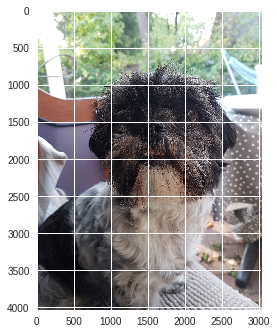

In [41]:
plt.imshow(imageio.imread("anni.jpg"))
plt.show()